# 선형 회귀 (농어 무게 예측하기)

> 농어의 길이, 높이, 두께를 이용해서 무게(숫자)를 예측하는 문제

* 무게는 숫자이므로 이 문제는 회귀(Regression)문제이다.
* 사용한 모델 : 선형 회귀 모델, 다항 회귀 모델

이번 학습에서는 k-최근접 이웃 알고리즘의 한계를 알아보고 선형 회귀 모델, 다항 회귀 모델에 대해서 알아본다.

## k-최근접 이웃 알고리즘의 한계

이전에 학습한 k-최근접 이웃 회귀 모델을 이용해서 농어 무게 예측하기 문제를 해결하면 다음과 같은 문제가 생긴다.

> 훈련 세트의 범위를 벗어나는 데이터가 주어지면 이상한 값을 예측할 수 있다.

아래 예에서, 새로운 농어의 길이가 50cm, 100cm처럼 훈련 세트의 범위를 벗어나면 계속 1033.33g으로 예측하는 것을 볼 수 있다.

그 이유는 k-최근접 이웃 회귀 모델은 새로운 샘플에 대한 k개의 최근접 이웃들을 구하고, 그 이웃들의 타깃값들의 평균을 새로운 샘플의 예측값으로 사용하기 때문이다.

k-최근접 이웃 회귀 모델을 이용해서 이 문제를 해결하려면 가장 큰 농어가 포함되도록 훈련 세트를 다시 구성해야 한다.

### 데이터 준비

In [88]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [89]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### 모델 생성 및 검증

In [90]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

# 길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

[1033.33333333]


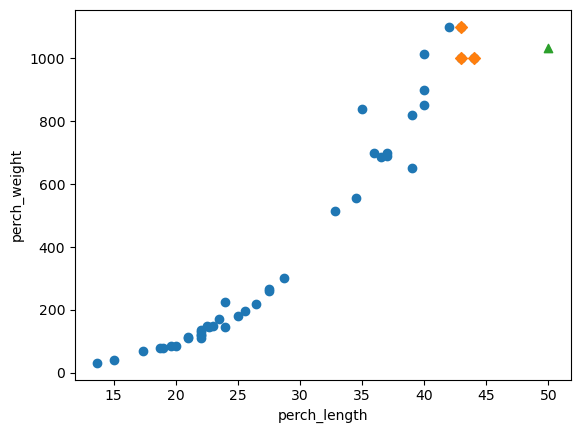

In [91]:
# 훈련 세트와 50cm 농어, 그리고 이 농어의 최근접 이웃을 산점도에 표시
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플들을 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 50cm 농어 데이터
plt.scatter(50, 1033, marker="^")

plt.xlabel("perch_length")
plt.ylabel("perch_weight")
plt.show()

In [92]:
# 이웃 샘플들의 타깃값의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [93]:
# 길이가 100cm인 농어의 무게 예측
print(knr.predict([[100]]))

[1033.33333333]


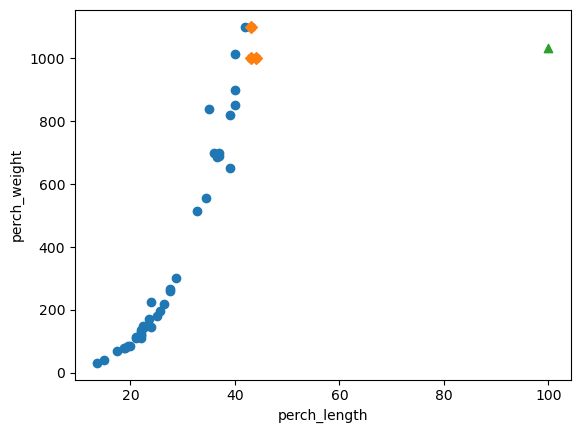

In [94]:
# 100cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플들을 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 100cm 농어 데이터
plt.scatter(100, 1033, marker="^")

plt.xlabel("perch_length")
plt.ylabel("perch_weight")
plt.show()

## 선형 회귀 모델

> 선형 회귀, 계수, 가중치, 모델 파라미터, 모델 기반 학습, 사례 기반 학습

선형 회귀 모델을 사용하면 새로운 농어 데이터를 사용해서 훈련 세트를 다시 구성하지 않아도 범위를 벗어나는 데이터를 이상하게 에측하는 문제를 해결할 수 있다.

우리 예제에서처럼 하나의 특성(길이)이 존재하면 선형 회귀 모델은 1차 방정식 그래프, 즉 직선의 형태를 띄게 된다.

하나의 직선을 그리려면 기울기와 y절편이 필요한데, 머신러닝에서 기울기는 '계수(coefficient)' 또는 '가중치(weight)'라고 부른다.

또한 기울기와 y절편 값과 같이 머신러닝 알고리즘이 스스로 찾은 값은 '모델 파라미터(model parameter)'라고 한다.

많은 머신러닝 알고리즘은 이처럼 모델 파라미터 값을 학습한다. 이러한 학습을 '모델 기반 학습'이라고 한다.

반면, k-최근접 이웃 알고리즘과 같이 모델 파라미터가 존재하지 않고 학습 데이터를 단지 저장하는 것이 전부인 학습을 '사례 기반 학습'이라고 한다.

### 데이터 준비

In [95]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [96]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### 모델 생성

In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델을 학습
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [98]:
# 선형 회귀 모델의 파라미터 값인 기울기(계수 또는 가중치)와 y절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


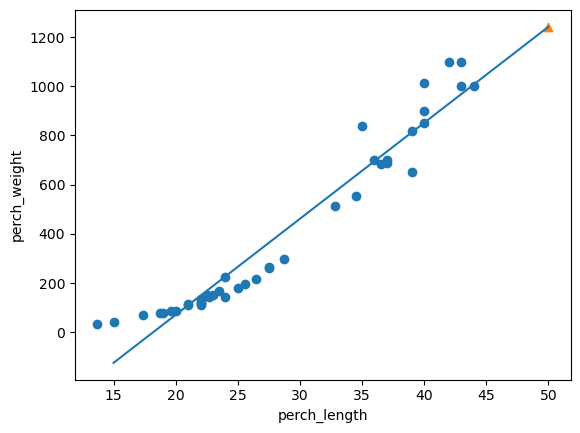

In [99]:
# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그리기
plt.plot([15, 50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241, marker="^")

plt.xlabel("perch_length")
plt.ylabel("perch_weight")
plt.show()

### 검증

* 학습 세트 점수 : 0.9398463339976041
* 테스트 세트 점수 : 0.824750312331356

In [100]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


## 다항 회귀 모델

선형 휘귀 모델을 이용하면 농어의 무게가 0g 이하가 나올 수 있다.

이런 문제를 해결하기 위해서 최적의 직선을 찾기보다 '최적의 곡선'을 찾는 것이 더 좋을 수 있다.

최적의 곡선을 찾기 위해서 2차 방정식, 즉 다항식을 사용해서 선형 회귀를 수행할 수 있다. 이러한 선형 회귀를 '다항 회귀'라고 한다.

> 다항 회귀 : 다항식을 사용한 선형 회귀 방법

2차 방정식은 선형인 형태가 아니지만 제곱항을 하나의 변수로 치환하여 생각하면 특성이 2개인 선형 회귀 모델로 생각할 수 있다.

농어 무게 예측하기 문제에서는 특성으로 길이 데이터 하나만 존재했다.

이 길이 값을 제곱한 값을 새로운 특성 데이터로 추가하여 선형 회귀 모델을 학습하면 다항 회귀를 수행할 수 있다.

### 데이터 준비

In [101]:
# 다항식을 구현하기 위해 농어의 길이를 제곱한 값과 농어 길이를 합친 데이터를 준비
train_poly_input = np.column_stack((train_input ** 2, train_input))
test_poly_input = np.column_stack((test_input ** 2, test_input))

print(train_poly_input.shape)
print(test_poly_input.shape)

(42, 2)
(14, 2)


### 모델 생성

In [102]:
lr = LinearRegression()

# train_poly_input을 사용해 선형 회귀 모델을 학습
lr.fit(train_poly_input, train_target)

# 50cm 농어 무게 예측
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [103]:
# 다항 회귀 모델의 계수와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


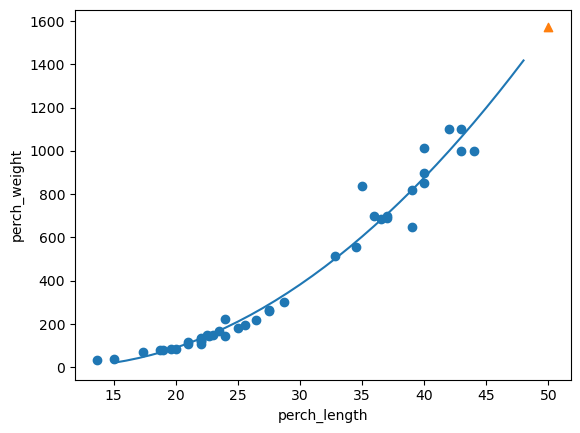

In [104]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
point = np.arange(15, 49)

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)

# 50cm 농어 데이터
plt.scatter(50, lr.predict([[50 ** 2, 50]]), marker="^")

plt.xlabel("perch_length")
plt.ylabel("perch_weight")
plt.show()

### 검증

* 학습 세트 점수 : 0.9706807451768623
* 테스트 세트 점수 : 0.9775935108325122

선형 회귀 모델에서보다 학습 세트 점수와 테스트 세트 점수가 높아진 것을 볼 수 있지만, 여전히 테스트 세트 점수가 학습 세트 점수보다 높은 과소적합을 관측할 수 있다.

해당 문제에 대해서는 다음 장에서 알아볼 예정이다.

In [105]:
print(lr.score(train_poly_input, train_target))
print(lr.score(test_poly_input, test_target))

0.9706807451768623
0.9775935108325122
